# Analysis and Prediction of Chronic Kidney Disease using Machine Learning Classification approaches

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
%matplotlib inline

# Importing the dataset

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


# Cleaning the Data

In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#cleaning of data for garbage values
df.replace(to_replace = "	?", value= np.nan, inplace= True)
df.head()

#using techniques like mean and mode to fill the missing values
for column in df.columns:
        if df[column].dtype == np.number:
            #filled the missing values of numeric dataset with the mean of the column
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            #filled the missing values of string dataset with the mode of the column
            df[column].fillna(df[column].value_counts().idxmax(), inplace=True)
            #converting the string values into categorical values for evaluation through different models
            df[column] = LabelEncoder().fit_transform(df[column])
#renaming column classification to class
df.rename(columns = {'classification':'class'},inplace = True)
#removing the column id as it has no actual use in my project and is an extra column
df.drop('id',axis=1,inplace=True)
df.head()

#furter cleaning of dataframe if any more NAN values are left
df = df.dropna(axis=0)
#gives the count of uniques values in the column class
df['class'].value_counts()


0    250
1    150
Name: class, dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,400.0,51.483376,16.974966,2.000,42.000,54.000000,64.000000,90.000
bp,400.0,76.469072,13.476298,50.000,70.000,78.234536,80.000000,180.000
sg,400.0,1.017408,0.005369,1.005,1.015,1.017408,1.020000,1.025
al,400.0,1.016949,1.272318,0.000,0.000,1.000000,2.000000,5.000
su,400.0,0.450142,1.029487,0.000,0.000,0.000000,0.450142,5.000
bgr,400.0,148.036517,74.782634,22.000,101.000,126.000000,150.000000,490.000
bu,400.0,57.425722,49.285887,1.500,27.000,44.000000,61.750000,391.000
sc,400.0,3.072454,5.617490,0.400,0.900,1.400000,3.072454,76.000
sod,400.0,137.528754,9.204273,4.500,135.000,137.528754,141.000000,163.000
pot,400.0,4.627244,2.819783,2.500,4.000,4.627244,4.800000,47.000


In [6]:
X = df.iloc[:,0:24]
#y is THE CLASSIFICATION COLUMN IT WILL BE USED LATER IN THE TEST_tRAIN_SPLIT
y = df.iloc[:,-1] 

## Selecting Best Attributes For Classification

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00491075 0.00866865 0.14126703 0.06043585 0.00281527 0.02034735
 0.00748745 0.01816587 0.0238375  0.00524725 0.15201888 0.03180224
 0.0046756  0.11237831 0.20504643 0.05237518 0.00576525 0.05222028
 0.00519996 0.02733184 0.04249823 0.0024336  0.00542342 0.00764784]


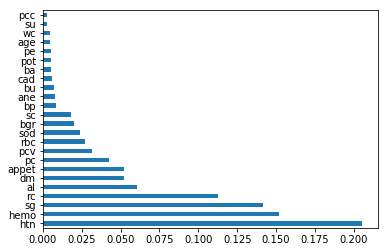

Index(['htn', 'hemo', 'sg', 'rc', 'al', 'dm'], dtype='object')


In [7]:
from sklearn.ensemble import ExtraTreesClassifier
#the below code is used to find the best attributes out of the 24.
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#THIS LINE I HAVE STORED THE TOP 6 VALUES INTO x SO WHENEVR YOU WANT TO CHANGE THE NUMBER OF ATTRIBUTES AND TEST JUST CHANGE THE NUMBER
x = feat_importances.nlargest(6).keys()
feat_importances.nlargest(25).plot(kind='barh')
plt.show()
print (x)

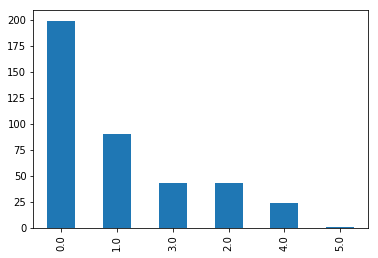

In [8]:
df['al']=df['al'].round(decimals=0)
Albumin = df['al']
data = Albumin.value_counts()
Albumin.value_counts().plot(kind='bar');
#sns.distplot(Albumin, hist=False, kde=True, 
 #            bins=int(180/5), color = 'darkblue', 
  #           hist_kws={'edgecolor':'black'},
   #          kde_kws={'shade': True, 'linewidth': 2})

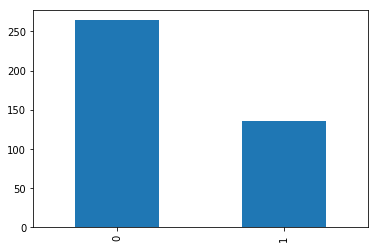

In [9]:
df['dm'] = df['dm'].replace([0,1,2],[0,0,1])
Diabetes = df['dm']
data = Diabetes.value_counts()
Diabetes.value_counts().plot(kind='bar');

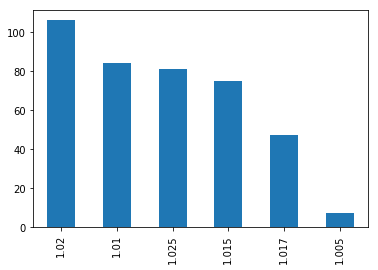

In [10]:
df['sg']=df['sg'].round(decimals=3)
SpecificG = df['sg']
data = SpecificG.value_counts()
SpecificG.value_counts().plot(kind='bar');

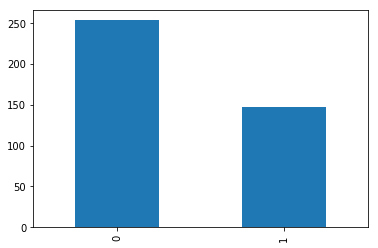

In [11]:
Hypertenion = df['htn']
data = Hypertenion.value_counts()
Hypertenion.value_counts().plot(kind='bar');

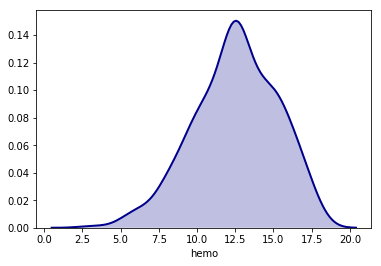

In [12]:
Haemoglobin = df['hemo']
data = Haemoglobin.value_counts()
#Haemoglobin.value_counts().plot(kind='bar');
sns.distplot(Haemoglobin, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 2})

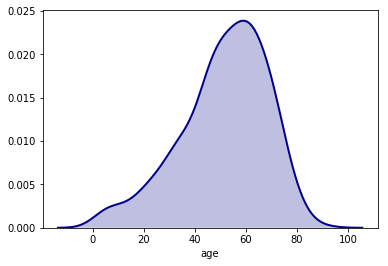

In [13]:
Age = df['age']
data = Age.value_counts()
#Age.value_counts().plot(kind='bar');
sns.distplot(Age, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 2})

In [14]:
#I HAVE DROPPED THE OTHER COLUMN WHICH WHERE NOT REQUIRED. IF THE VALUE OF x WILL BE 24 THAN ALL THE COLUMN WILL BE INCLUDED
df = df.drop([col for col in df.columns if not col in x ], axis=1)
df.head()

,sg,al,hemo,rc,htn,dm
0,1.020,1.0,15.4,5.200000,1,1
1,1.020,4.0,11.3,4.707435,0,0
2,1.010,2.0,9.6,4.707435,0,1
3,1.005,4.0,11.2,3.900000,1,0
4,1.010,2.0,11.6,4.600000,0,0


In [15]:
#THIS CONTAINS THE COLUMNS OF DF EXCLUDING CLASSIFICATION COLUMN
X = df

In [16]:
#these lines of code are used for feature scaling using normalization.
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)
print(X.head())

     sg   al      hemo        rc  htn   dm
0  0.75  0.2  0.836735  0.525424  1.0  1.0
1  0.75  0.8  0.557823  0.441938  0.0  0.0
2  0.25  0.4  0.442177  0.441938  0.0  1.0
3  0.00  0.8  0.551020  0.305085  1.0  0.0
4  0.25  0.4  0.578231  0.423729  0.0  0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

In [18]:
log_cols = ["Classifier", "Accuracy", "Precision Score", "F1 Score", 'Log Loss']
log = pd.DataFrame(columns=log_cols)

# K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
name = classifier.__class__.__name__
print(name)
try:
    print('****Results****')
    train_predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print("precision_score: \n",precision_score(y_test, train_predictions))
    print("f1_score: \n",f1_score(y_test, train_predictions))
    print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
    print("log_loss: \n",log_loss(y_test, train_predictions))
    log_entry = pd.DataFrame([[name, acc*100,precision_score(y_test, train_predictions), f1_score(y_test, train_predictions), log_loss( y_test, train_predictions)]], columns=log_cols)
    log = log.append(log_entry)
except Exception as e:
    print (e)

KNeighborsClassifier
****Results****
Accuracy: 96.2121%
precision_score: 
 0.8837209302325582
f1_score: 
 0.9382716049382717
confusion_matrix: 
 [[89  5]
 [ 0 38]]
log_loss: 
 1.3083172724371552


# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)
name = classifier.__class__.__name__
print(name)
try:
    print('****Results****')
    train_predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print("precision_score: \n",precision_score(y_test, train_predictions))
    print("f1_score: \n",f1_score(y_test, train_predictions))
    print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
    print("log_loss: \n",log_loss(y_test, train_predictions))
    log_entry = pd.DataFrame([[name, acc*100,precision_score(y_test, train_predictions), f1_score(y_test, train_predictions), log_loss( y_test, train_predictions)]], columns=log_cols)
    log = log.append(log_entry)
except Exception as e:
    print (e)


DecisionTreeClassifier
****Results****
Accuracy: 96.9697%
precision_score: 
 0.9047619047619048
f1_score: 
 0.9500000000000001
confusion_matrix: 
 [[90  4]
 [ 0 38]]
log_loss: 
 1.0466538179497245


# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)
name = classifier.__class__.__name__
print(name)
try:
    print('****Results****')
    train_predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print("precision_score: \n",precision_score(y_test, train_predictions))
    print("f1_score: \n",f1_score(y_test, train_predictions))
    print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
    print("log_loss: \n",log_loss(y_test, train_predictions))
    log_entry = pd.DataFrame([[name, acc*100,precision_score(y_test, train_predictions), f1_score(y_test, train_predictions), log_loss( y_test, train_predictions)]], columns=log_cols)
    log = log.append(log_entry)
except Exception as e:
    print (e)

RandomForestClassifier
****Results****
Accuracy: 98.4848%
precision_score: 
 0.95
f1_score: 
 0.9743589743589743
confusion_matrix: 
 [[92  2]
 [ 0 38]]
log_loss: 
 0.5233269089748628


# AdaBoost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators = 10, random_state = 50)
classifier.fit(X_train, y_train)
name = classifier.__class__.__name__
print(name)
try:
    print('****Results****')
    train_predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print("precision_score: \n",precision_score(y_test, train_predictions))
    print("f1_score: \n",f1_score(y_test, train_predictions))
    print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
    print("log_loss: \n",log_loss(y_test, train_predictions))
    log_entry = pd.DataFrame([[name, acc*100,precision_score(y_test, train_predictions), f1_score(y_test, train_predictions), log_loss( y_test, train_predictions)]], columns=log_cols)
    log = log.append(log_entry)
except Exception as e:
    print (e)

AdaBoostClassifier
****Results****
Accuracy: 98.4848%
precision_score: 
 0.95
f1_score: 
 0.9743589743589743
confusion_matrix: 
 [[92  2]
 [ 0 38]]
log_loss: 
 0.5233269089748628


# GaussianNB Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
name = classifier.__class__.__name__
print(name)
try:
    print('****Results****')
    train_predictions = classifier.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    print("precision_score: \n",precision_score(y_test, train_predictions))
    print("f1_score: \n",f1_score(y_test, train_predictions))
    print("confusion_matrix: \n",confusion_matrix(y_test, train_predictions))
    print("log_loss: \n",log_loss(y_test, train_predictions))
    log_entry = pd.DataFrame([[name, acc*100,precision_score(y_test, train_predictions), f1_score(y_test, train_predictions), log_loss( y_test, train_predictions)]], columns=log_cols)
    log = log.append(log_entry)
except Exception as e:
    print (e)

GaussianNB
****Results****
Accuracy: 90.9091%
precision_score: 
 0.76
f1_score: 
 0.8636363636363636
confusion_matrix: 
 [[82 12]
 [ 0 38]]
log_loss: 
 3.1399614538491716


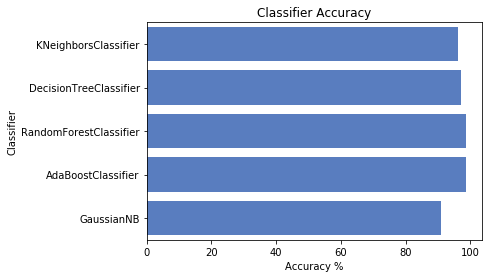

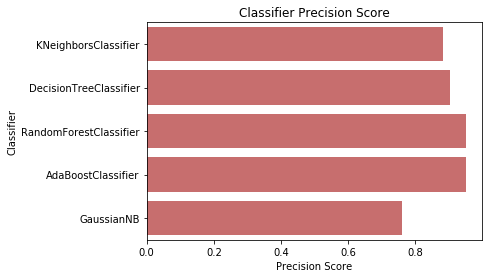

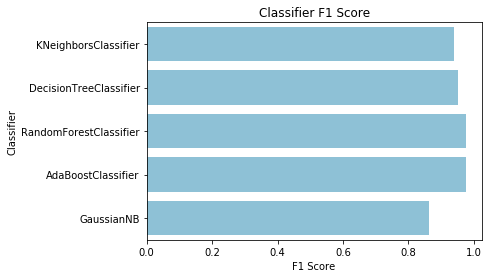

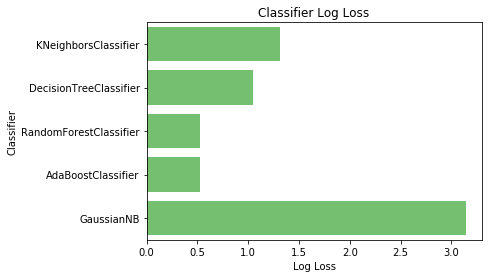

In [24]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Precision Score', y='Classifier', data=log, color="r")

plt.xlabel('Precision Score')
plt.title('Classifier Precision Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='F1 Score', y='Classifier', data=log, color="c")

plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# Thank You